In [1]:
import scipy.io as sio
import os
import numpy as np

from sklearn import preprocessing

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
current = sio.loadmat('../datasets/CS2018_12_14/Current.mat')
voltage = sio.loadmat('../datasets/CS2018_12_14/Voltage.mat')
stator_plus = sio.loadmat('../datasets/CS2018_12_14/StatorPuls.mat')
speed = sio.loadmat('../datasets/CS2018_12_14/Speed.mat')
torque = sio.loadmat('../datasets/CS2018_12_14/Torque.mat')

In [3]:
dataset = np.hstack((voltage['Voltage'], stator_plus['StatorPuls'], speed['Speed'], current['Current'], torque['Torque']))
dataset.shape

(240001, 7)

In [4]:

current['Current'].shape, voltage['Voltage'].shape, stator_plus['StatorPuls'].shape, speed['Speed'].shape, torque['Torque'].shape

((240001, 2), (240001, 2), (240001, 1), (240001, 1), (240001, 1))

In [5]:
current1_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
current1_scaler.fit(dataset[:,4:5])

current2_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
current2_scaler.fit(dataset[:,5:6])

torque_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
torque_scaler.fit(dataset[:,6:7])

voltage1_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
voltage1_scaler.fit(dataset[:,0:1])

voltage2_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
voltage2_scaler.fit(dataset[:,1:2])

statorpuls_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
statorpuls_scaler.fit(dataset[:,2:3])

speed_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
speed_scaler.fit(dataset[:,3:4])

MinMaxScaler(copy=True, feature_range=[0, 1])

In [41]:
result = np.load('../datasets/results_npy/SE_data_cnn100_out.npy')

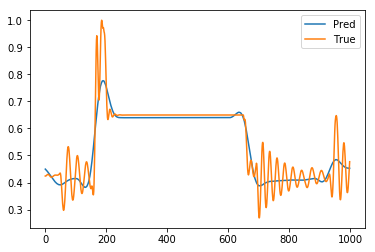

In [46]:
plt.plot(result[0,1000:2000], label='Pred')
plt.plot(result[1,1000:2000], label='True')
plt.legend()


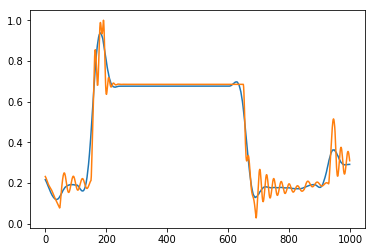

In [43]:
plt.plot(result[2,1000:2000])
plt.plot(result[3,1000:2000])

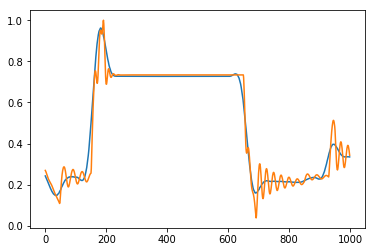

In [44]:
plt.plot(result[4,1000:2000])
plt.plot(result[5,1000:2000])

In [78]:
result = np.load('../datasets/results_npy/SE_data_dcnn100_out.npy')
start = 2000
end = 3000

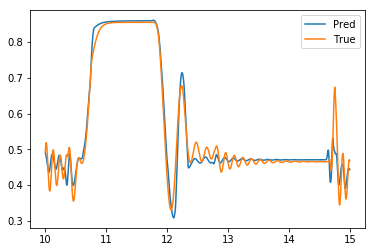

In [79]:
x = [x * 0.005 for x in range(start, end)]
plt.plot(x, result[0,start:end], label='Pred')
plt.plot(x, result[1,start:end], label='True')
plt.legend()


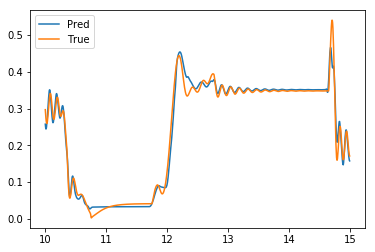

In [85]:

plt.plot(x, result[2,start:end], label='Pred')
plt.plot(x, result[3,start:end], label='True')
plt.legend()

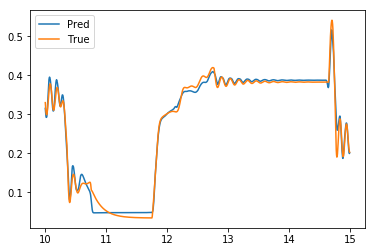

In [81]:

plt.plot(x, result[4,start:end], label='Pred')
plt.plot(x, result[5,start:end], label='True')
plt.legend()

In [11]:
result = np.load('../datasets/results_npy/SE_data_relu_dcnn100_out.npy')
start = 0
end = 1000

In [12]:
x = result[-1,start:end]

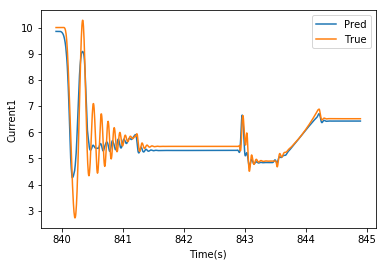

In [13]:

plt.plot(x, current1_scaler.inverse_transform(result[0:1,start:end]).flatten(), label='Pred')
plt.plot(x, current1_scaler.inverse_transform(result[1:2,start:end]).flatten(), label='True')
plt.legend()
plt.ylabel('Current1')
plt.xlabel('Time(s)')
plt.savefig('current1_vs_time.pdf',dpi=500)

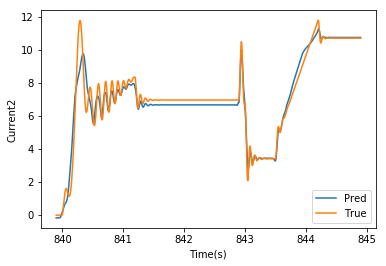

In [14]:
plt.plot(x, current2_scaler.inverse_transform(result[2:3,start:end]).flatten(), label='Pred')
plt.plot(x, current2_scaler.inverse_transform(result[3:4,start:end]).flatten(), label='True')
plt.legend()
plt.ylabel('Current2')
plt.xlabel('Time(s)')
plt.savefig('current2_vs_time.pdf',dpi=500)

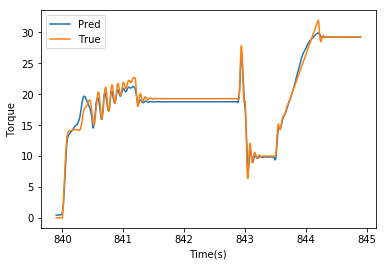

In [15]:
plt.plot(x, torque_scaler.inverse_transform(result[4:5,start:end]).flatten(), label='Pred')
plt.plot(x, torque_scaler.inverse_transform(result[5:6,start:end]).flatten(), label='True')
plt.legend()
plt.ylabel('Torque')
plt.xlabel('Time(s)')
plt.savefig('torque_vs_time.pdf',dpi=500)

In [17]:
# result = np.load('../datasets/results_npy/SE_data_relu_dcnn100_out.npy')
# result = np.load('../datasets/results_npy/SE_data_relu_dcnn_4layers100_out.npy')
result = np.load('../datasets/results_npy/SE_data_combined_relu_dcnn_4layers100_out.npy')

In [18]:
smooth = False

In [19]:
current1_pred = result[0]
current1_true = result[1]
current2_pred = result[2]
current2_true = result[3]
torque_pred = result[4]
torque_true = result[5]

voltage1_true = result[6]
voltage2_true = result[7]
statorpuls_true = result[8]
speed_true = result[9]

if smooth:
    time = np.arange(result[-1][0][0], result[-1][-1][-1], 0.005)
    c1_true = [None for x in range(time.shape[0])]
    c1_pred = [None for x in range(time.shape[0])]
    c2_true = [None for x in range(time.shape[0])]
    c2_pred = [None for x in range(time.shape[0])]
    t_true = [None for x in range(time.shape[0])]
    t_pred = [None for x in range(time.shape[0])]

    for i in range(current1_true.shape[0]):
        for j in range(current1_true[i].shape[0]):
            c1_true[i+j] = current1_true[i,j]

    for i in range(current1_pred.shape[0]):
        for j in range(current1_pred[i].shape[0]):
            if not c1_pred[i+j]:
                c1_pred[i+j] = current1_pred[i,j]
            else:
                c1_pred[i+j] = (c1_pred[i+j] + current1_pred[i,j]) / 2

    for i in range(current2_true.shape[0]):
        for j in range(current2_true[i].shape[0]):
            c2_true[i+j] = current2_true[i,j]

    for i in range(current2_pred.shape[0]):
        for j in range(current2_pred[i].shape[0]):
            if not c2_pred[i+j]:
                c2_pred[i+j] = current2_pred[i,j]
            else:
                c2_pred[i+j] = (c2_pred[i+j] + current2_pred[i,j]) / 2

    for i in range(torque_true.shape[0]):
        for j in range(torque_true[i].shape[0]):
            t_true[i+j] = torque_true[i,j]

    for i in range(torque_pred.shape[0]):
        for j in range(torque_pred[i].shape[0]):
            if not t_pred[i+j]:
                t_pred[i+j] = torque_pred[i,j]
            else:
                t_pred[i+j] = (t_pred[i+j] + torque_pred[i,j]) / 2

else:
    time = []
    c1_true = []
    c1_pred = []
    c2_true = []
    c2_pred = []
    t_true = []
    t_pred = []
    
    v1_true = []
    v2_true = []
    sp_true = []
    s_true = []
    
    loc = 50
    
    for i in range(result.shape[1]):
        time.append(result[-1][i][loc])
        c1_true.append(current1_true[i][loc])
        c1_pred.append(current1_pred[i][loc])
        c2_true.append(current2_true[i][loc])
        c2_pred.append(current2_pred[i][loc])
        t_true.append(torque_true[i][loc])
        t_pred.append(torque_pred[i][loc])
        
        v1_true.append(voltage1_true[i][loc])
        v2_true.append(voltage2_true[i][loc])
        sp_true.append(statorpuls_true[i][loc])
        s_true.append(speed_true[i][loc])


In [20]:
c1_pred = current1_scaler.inverse_transform(np.asarray([c1_pred])).flatten()
c1_true = current1_scaler.inverse_transform(np.asarray([c1_true])).flatten()

c2_pred = current2_scaler.inverse_transform(np.asarray([c2_pred])).flatten()
c2_true = current2_scaler.inverse_transform(np.asarray([c2_true])).flatten()

t_pred = torque_scaler.inverse_transform(np.asarray([t_pred])).flatten()
t_true = torque_scaler.inverse_transform(np.asarray([t_true])).flatten()

v1_true = voltage1_scaler.inverse_transform(np.asarray([v1_true])).flatten()
v2_true = voltage2_scaler.inverse_transform(np.asarray([v2_true])).flatten()
sp_true = statorpuls_scaler.inverse_transform(np.asarray([sp_true])).flatten()
s_true = speed_scaler.inverse_transform(np.asarray([s_true])).flatten()

In [21]:
start = int(0 / 0.005)
end = int(22 / 0.005)

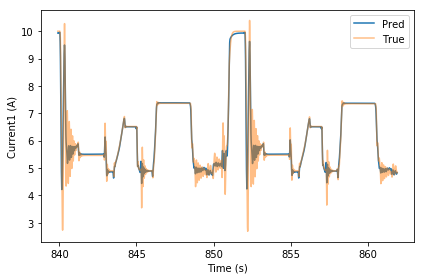

In [22]:
plt.plot(time[start:end], c1_pred[start:end], label='Pred')
plt.plot(time[start:end], c1_true[start:end], label='True', alpha=0.5)
plt.legend()
plt.ylabel('Current1 (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/current1_pred_vs_time.pdf',dpi=500,quality=100)


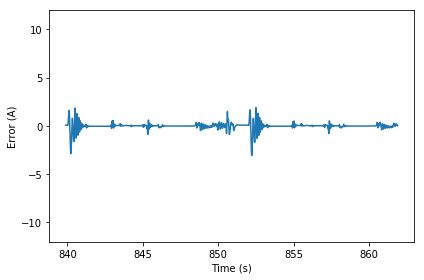

In [23]:
plt.plot(time[start:end], (c1_true[start:end] - c1_pred[start:end]))
plt.ylim(-12,12)
plt.ylabel('Error (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/current1_error_vs_time.pdf',dpi=500,quality=100)

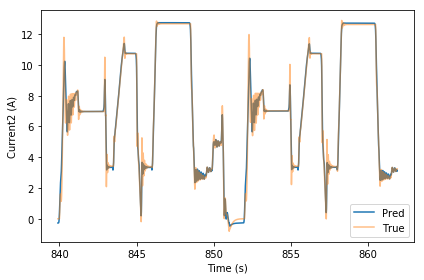

In [24]:
plt.plot(time[start:end], c2_pred[start:end], label='Pred')
plt.plot(time[start:end], c2_true[start:end], label='True', alpha=0.5)
plt.legend()
plt.ylabel('Current2 (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/current2_pred_vs_time.pdf',dpi=500,quality=100)

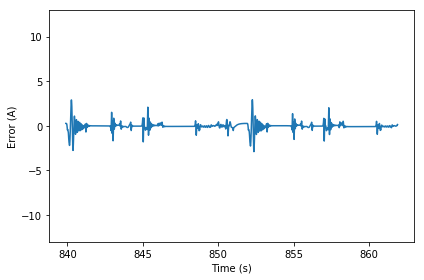

In [25]:
plt.plot(time[start:end], (c2_true[start:end] - c2_pred[start:end]))
plt.ylim(-13,13)
plt.ylabel('Error (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/current2_error_vs_time.pdf',dpi=500,quality=100)

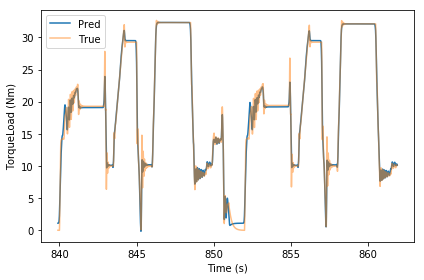

In [26]:
plt.plot(time[start:end], t_pred[start:end], label='Pred')
plt.plot(time[start:end], t_true[start:end], label='True', alpha=0.5)
plt.legend()
plt.ylabel('TorqueLoad (Nm)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/torqueload_pred_vs_time.pdf',dpi=500,quality=100)

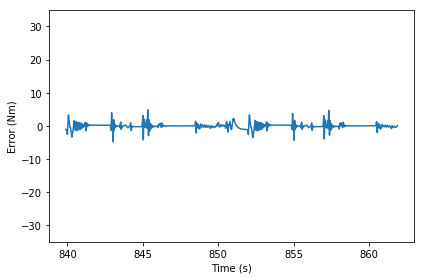

In [27]:
plt.plot(time[start:end], (t_true[start:end] - t_pred[start:end]))
plt.ylim(-35,35)
plt.ylabel('Error (Nm)')
plt.tight_layout()
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/torque_error_vs_time.pdf',dpi=500,quality=100)

In [345]:
rtime = np.asarray([[0.005 * x] for x in range(current['Current'].shape[0])])

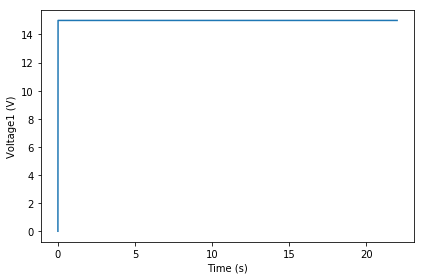

In [314]:
plt.plot(rtime[start:end], dataset[start:end, 0])
plt.ylabel('Voltage1 (V)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/voltage1_vs_time.pdf',dpi=500,quality=100)

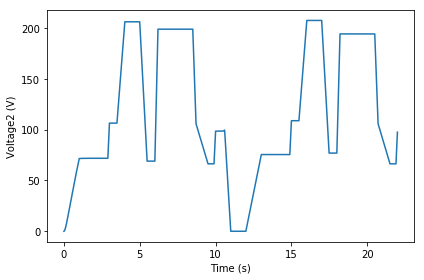

In [315]:
plt.plot(rtime[start:end], dataset[start:end, 1])
plt.ylabel('Voltage2 (V)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/voltage2_vs_time.pdf',dpi=500,quality=100)

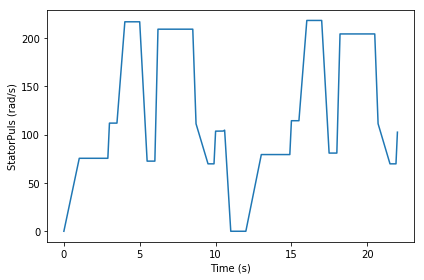

In [316]:
plt.plot(rtime[start:end], dataset[start:end, 2])
plt.ylabel('StatorPuls (rad/s)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/statorpuls_vs_time.pdf',dpi=500,quality=100)

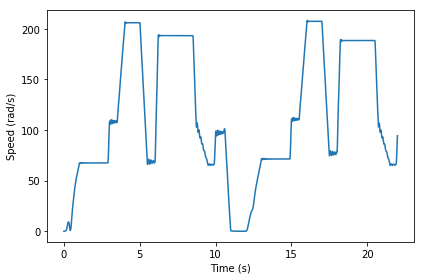

In [317]:
plt.plot(rtime[start:end], dataset[start:end, 3])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/speed_vs_time.pdf',dpi=500,quality=100)

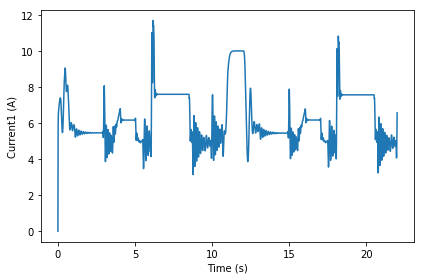

In [318]:
plt.plot(rtime[start:end], dataset[start:end, 4])
plt.ylabel('Current1 (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/current1_vs_time.pdf',dpi=500,quality=100)

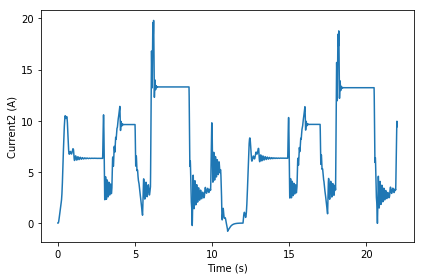

In [319]:
plt.plot(rtime[start:end], dataset[start:end, 5])
plt.ylabel('Current2 (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/current2_vs_time.pdf',dpi=500,quality=100)

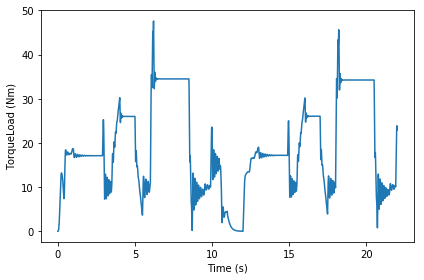

In [320]:
plt.plot(rtime[start:end], dataset[start:end, 6])
plt.ylabel('TorqueLoad (Nm)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/torqueload_vs_time.pdf',dpi=500,quality=100)

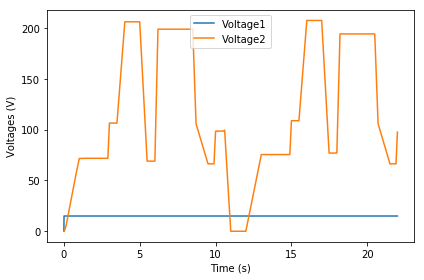

In [321]:
plt.plot(rtime[start:end], dataset[start:end, 0], label='Voltage1')
plt.plot(rtime[start:end], dataset[start:end, 1], label='Voltage2')
plt.legend()
plt.ylabel('Voltages (V)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/voltages_vs_time.pdf',dpi=500,quality=100)

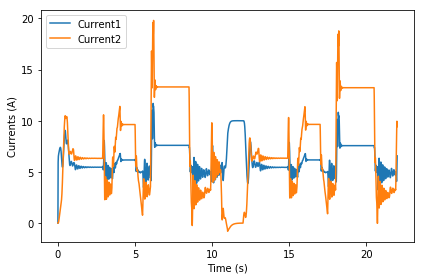

In [322]:
plt.plot(rtime[start:end], dataset[start:end, 4], label='Current1')
plt.plot(rtime[start:end], dataset[start:end, 5], label='Current2')
plt.legend()
plt.ylabel('Currents (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/currents_vs_time.pdf',dpi=500,quality=100)

In [358]:
results = {'current1_true':c1_true, 'current1_pred':c1_pred, 
           'current2_true': c2_true, 'current2_pred': c2_pred, 
           'torqueload_true': t_true, 'torqueload_pred': t_pred,
          'voltage1_true':v1_true, 'voltage2_true':v2_true, 
           'statorpuls_true':sp_true, 'speed_true': s_true,
           'time':time}

In [359]:
sio.savemat('../datasets/deconv_results.mat', results)